In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv("C:\ExcelR\Data Scientist\Clustering\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# EDA

In [5]:
crime2=crime.rename({'Unnamed: 0':'City'},axis=1)

In [6]:
crime_2=crime2.drop('City',axis=1)

In [7]:
crime=crime_2

In [8]:
crime3=crime.copy()


# H Clustering

In [9]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
norm=norm_func(crime.iloc[:,:])

In [11]:
norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


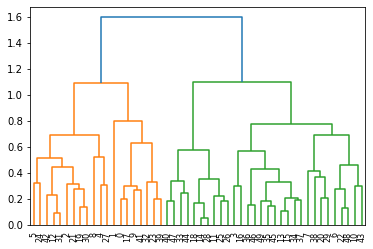

In [12]:
dendrogram=sch.dendrogram(sch.linkage(norm,method='complete'))

In [13]:
var=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [14]:
y=var.fit_predict(norm)
cluster=pd.DataFrame(y,columns=['Cluster'])
cluster

,Cluster
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [15]:
cluster.value_counts()

Cluster
0          20
1          20
2          10
dtype: int64

# K Means

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
model=KMeans(n_clusters=5) 
model.fit(crime)
model.labels_

array([3, 3, 2, 0, 3, 0, 4, 3, 2, 0, 1, 4, 3, 4, 1, 4, 4, 3, 1, 2, 0, 3,
       1, 3, 0, 4, 4, 3, 1, 0, 3, 3, 2, 1, 4, 0, 0, 4, 0, 3, 1, 0, 0, 4,
       1, 0, 0, 1, 1, 0])

In [20]:
cee=pd.Series(model.labels_)
crime['Cluster']=cee

In [21]:
norm

,Murder,Assault,UrbanPop,Rape,Cluster
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,2
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,3
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,4
7,0.307229,0.660959,0.677966,0.219638,3
8,0.879518,0.993151,0.813559,0.635659,2
9,1.000000,0.568493,0.474576,0.478036,0


In [23]:
crime.groupby(crime.Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,8.214286,173.285714,70.642857,22.842857
1,2.950000,62.700000,53.900000,11.510000
2,11.950000,316.500000,68.000000,26.700000
3,11.766667,257.916667,68.416667,28.933333
4,5.590000,112.400000,65.600000,17.270000


# DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [28]:
array=crime3.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [31]:
stscalar=StandardScaler().fit_transform(array)
stscalar

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [33]:
dbscan=DBSCAN(eps=0.8,min_samples=5)
dbscan.fit(stscalar)

DBSCAN(eps=0.8)

In [36]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [37]:
vew=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [38]:
vew

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [39]:
pd.concat([crime3,vew],axis=1)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
